In [1]:
# Importing necassery libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from mplfinance.original_flavor import candlestick2_ohlc

import plotly.graph_objects as go


In [2]:
# Reading dataset
df_asels = pd.read_csv("ASELS Historical Data.csv")

In [3]:
# First 10 data in dataset
# Date object is Mounth/Day/Year
# As it can see from head and tail of dataset it includes year 2022 week days
df_asels.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/02/2023,63.75,63.00,64.65,62.80,50.23M,2.57%
1,12/30/2022,62.15,59.40,63.30,59.35,179.05M,5.70%
2,12/29/2022,58.80,58.40,59.60,57.90,63.54M,0.68%
3,12/28/2022,58.40,58.00,58.75,56.15,92.32M,0.78%
4,12/27/2022,57.95,59.25,59.65,57.75,62.77M,-2.11%
5,12/26/2022,59.20,58.80,60.15,58.60,78.15M,2.07%
6,12/23/2022,58.00,58.25,59.25,57.65,51.95M,-0.17%
7,12/22/2022,58.10,59.55,60.05,57.60,66.30M,-1.94%
8,12/21/2022,59.25,61.20,61.65,58.85,100.70M,-2.87%
9,12/20/2022,61.00,59.45,62.25,58.90,149.19M,2.61%


In [4]:
df_asels.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
243,01/14/2022,24.02,24.16,24.22,23.66,38.35M,-0.66%
244,01/13/2022,24.18,24.08,24.78,24.00,75.08M,0.58%
245,01/12/2022,24.04,24.26,24.40,23.88,35.52M,0.67%
246,01/11/2022,23.88,24.40,24.46,23.33,59.13M,-0.83%
247,01/10/2022,24.08,23.56,24.62,23.50,71.71M,3.15%
248,01/07/2022,23.34,23.34,23.56,22.83,32.30M,0.86%
249,01/06/2022,23.15,22.65,23.64,22.57,59.22M,1.04%
250,01/05/2022,22.91,22.41,22.99,22.01,44.95M,2.31%
251,01/04/2022,22.39,21.91,22.67,21.73,53.08M,3.21%
252,01/03/2022,21.69,20.88,21.69,20.74,30.53M,4.41%


In [5]:
# There are 253 data in dataset
# Percentiles are like below
df_asels.describe(percentiles=[0.1, 0.3, 0.7, 0.9])

,Price,Open,High,Low
count,253.000000,253.000000,253.000000,253.000000
mean,29.241383,29.218696,29.921265,28.671897
std,10.291744,10.186036,10.626356,9.945096
min,18.810000,19.010000,20.060000,18.810000
10%,21.818000,21.870000,22.170000,21.502000
30%,23.306000,23.404000,23.836000,23.050000
50%,24.440000,24.440000,24.860000,24.100000
70%,29.890000,29.838000,30.838000,29.084000
90%,46.968000,46.588000,48.148000,45.876000
max,63.750000,63.000000,64.650000,62.800000


In [6]:
# There are 7 feature in this dataset. 4 of them numeric 3 of them objects.
df_asels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      253 non-null    object 
 1   Price     253 non-null    float64
 2   Open      253 non-null    float64
 3   High      253 non-null    float64
 4   Low       253 non-null    float64
 5   Vol.      253 non-null    object 
 6   Change %  253 non-null    object 
dtypes: float64(4), object(3)
memory usage: 14.0+ KB


In [7]:
# As it can seen there is no missing datum.
df_asels.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [8]:
df_asels.shape[0]

253

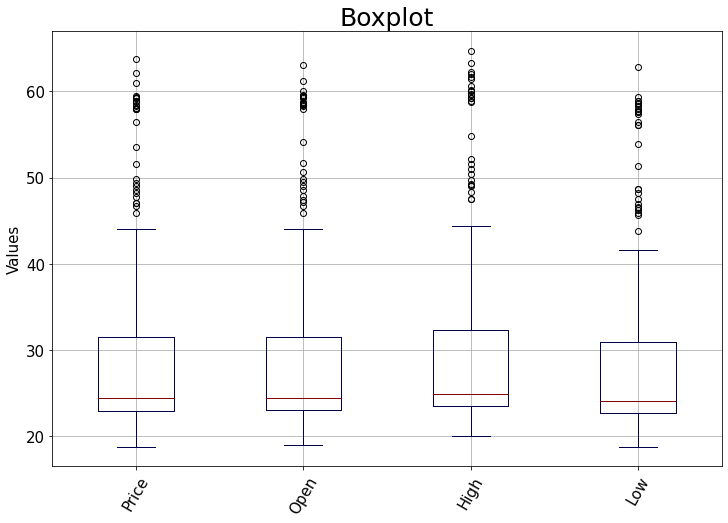

In [9]:
boxplot_pandas=df_asels.plot(y=["Price", "Open", "High","Low"], kind="box", title="Boxplot", rot=60, xlabel="Features",ylabel="Values", figsize = [12,8], grid=True, fontsize=15, colormap="seismic")
boxplot_pandas.set_title("Boxplot", fontsize=25)
boxplot_pandas.set_ylabel("Values",fontsize=15)
boxplot_pandas=boxplot_pandas.get_figure()
boxplot_pandas.savefig("Box-Plot-Pandas.png")


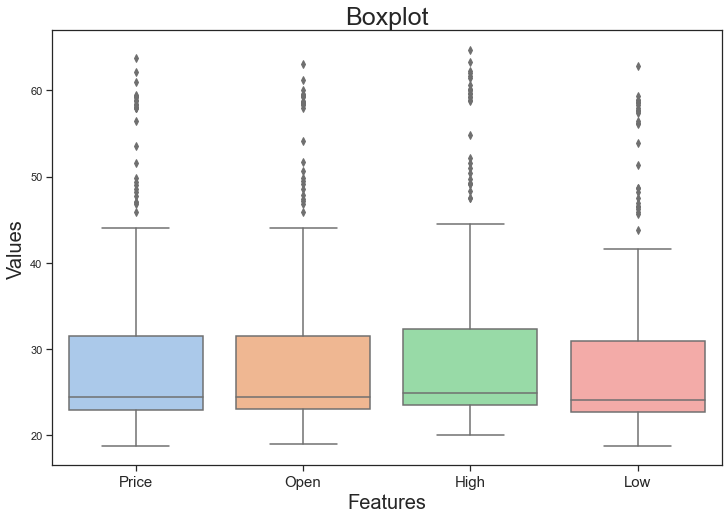

In [10]:
sns.set_theme(style="ticks", palette="pastel", rc={'figure.figsize':(12,8)})
boxplot = sns.boxplot(data=df_asels)
boxplot.set_title("Boxplot", fontsize=25)
boxplot.set_xticklabels(['Price', 'Open', 'High', 'Low'], fontsize=15)
boxplot.set_xlabel("Features",fontsize=20)
boxplot.set_ylabel("Values",fontsize=20)
boxplot = boxplot.get_figure()
boxplot.savefig("Box-Plot-Seaborn.png")

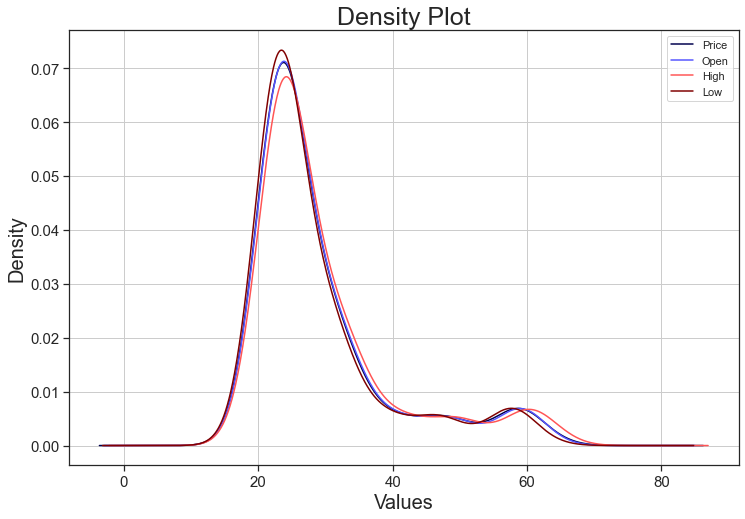

In [11]:
densityPlot_df = df_asels.plot(y=["Price", "Open", "High","Low"], kind="density", title="Boxplot", xlabel="Features",ylabel="Values", figsize = [12,8], grid=True, fontsize=15, colormap="seismic")
densityPlot_df.set_title("Density Plot", fontsize=25)
densityPlot_df.set_xlabel("Values",fontsize=20)
densityPlot_df.set_ylabel("Density",fontsize=20)

densityPlot_df = densityPlot_df.get_figure()
densityPlot_df.savefig("Density-Plot.png")


### Brief Information

As can be seen from the box plot, boxes are almost the same as expected because of values represents open, high and low price of **ASELS**. The important thing at first glance is the price of **ASELS** is close to 25 (Median). In addition, Although, most of the data are in between upper and lower quartiles and these quartiles are close to between 25-35, there are some outline values. 
<br><br> Also in the density plot, it can easily be seen the price of ASELS tries 20-40 most of the time.

In [12]:
df_asels["Change %"]

0       2.57%
1       5.70%
2       0.68%
3       0.78%
4      -2.11%
        ...  
248     0.86%
249     1.04%
250     2.31%
251     3.21%
252     4.41%
Name: Change %, Length: 253, dtype: object

In [13]:
type(df_asels["Change %"][0])

str

### Converting string Change % feature to new Change float

In [14]:
change_array=[]
for i in range(0,df_asels.shape[0]):
    change_array.append(float(df_asels["Change %"][i].split("%")[0]))

In [15]:
df_asels["Change Values"]=change_array

In [16]:
df_asels.head()

,Date,Price,Open,High,Low,Vol.,Change %,Change Values
0,01/02/2023,63.75,63.00,64.65,62.80,50.23M,2.57%,2.57
1,12/30/2022,62.15,59.40,63.30,59.35,179.05M,5.70%,5.70
2,12/29/2022,58.80,58.40,59.60,57.90,63.54M,0.68%,0.68
3,12/28/2022,58.40,58.00,58.75,56.15,92.32M,0.78%,0.78
4,12/27/2022,57.95,59.25,59.65,57.75,62.77M,-2.11%,-2.11


In [17]:
type(df_asels["Change Values"][0])

numpy.float64

In [18]:
df_asels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           253 non-null    object 
 1   Price          253 non-null    float64
 2   Open           253 non-null    float64
 3   High           253 non-null    float64
 4   Low            253 non-null    float64
 5   Vol.           253 non-null    object 
 6   Change %       253 non-null    object 
 7   Change Values  253 non-null    float64
dtypes: float64(5), object(3)
memory usage: 15.9+ KB


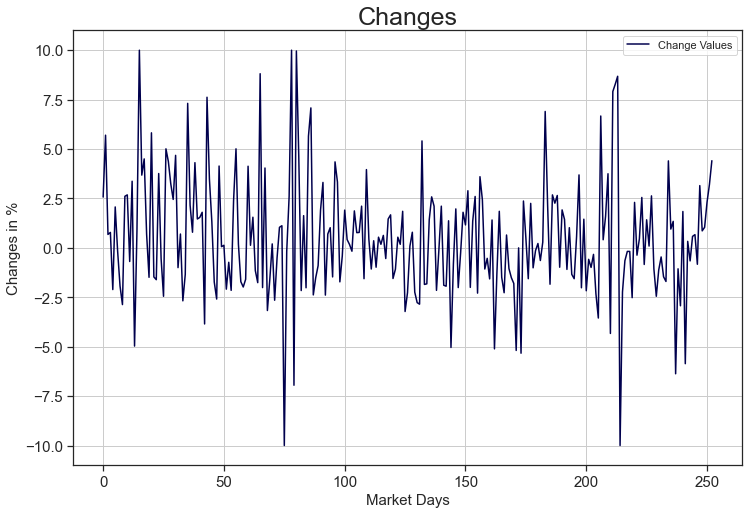

In [19]:
# There are 253 market days in dataset
lineplot = df_asels.plot(y=["Change Values"], kind="line", title="Boxplot", xlabel="Market Days",ylabel="Changes in %", figsize = [12,8], grid=True, fontsize=15, colormap="seismic")
lineplot.set_title("Changes", fontsize=25)
lineplot.set_xlabel("Market Days",fontsize=15)
lineplot.set_ylabel("Changes in %",fontsize=15)

lineplot = lineplot.get_figure()
lineplot.savefig("Asels-Behaviour-Plot.png")

In [26]:
fig = go.Figure(data=[go.Candlestick(x=df_asels['Date'],
                open=df_asels['Open'],
                high=df_asels['High'],
                low=df_asels['Low'],
                close=df_asels['Price'])])

fig.write_image("Candle graph.png")
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


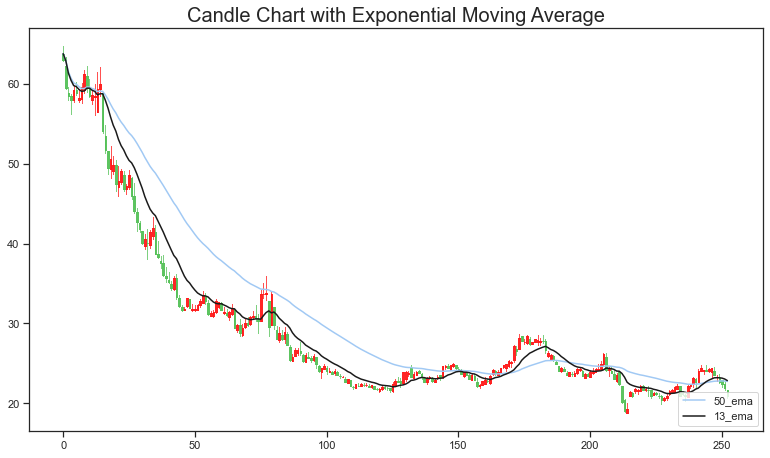

In [24]:
#nif['Date'] = pd.to_datetime(nif['Date'], format='%d-%m-%Y', utc=True)

mavg = df_asels['Price'].ewm(span=50).mean()
mavg1 = df_asels['Price'].ewm(span=13).mean()

fg, ax1 = plt.subplots()

cl = candlestick2_ohlc(ax1, opens=df_asels["Open"],closes=df_asels["Price"],highs=df_asels["High"],lows=df_asels["Low"], width=.6, colorup='#53c156', colordown='#ff1717')
mavg.plot(ax=ax1,label='50_ema')
mavg1.plot(color='k',ax=ax1, label='13_ema')

plt.legend(loc=4)
plt.title("Candle Chart with Exponential Moving Average",fontsize=20)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.savefig("Candle Chart with Exponential Moving Average")
plt.show()

## Meanings of Variables

### N1 &rarr; Negative2Positive in Changes
### N2 &rarr; Positive2Positive in Changes
### N3 &rarr; Positive2Negative in Changes
### N4 &rarr; Negative2Negative in Changes

In [22]:
def train_update(df,train_size):
    df_train=df.iloc[:train_size,:]
    df_test=df.iloc[train_size:,:]
    
    previous_value = 0.0
    n1=[]
    n2=[]
    n3=[]
    n4=[]
    
    for i in range(0,len(df_train["Change Values"])):
        if df_train["Change Values"][i] >= 0.0 and previous_value < 0.0:
            n1.append([df_train["Change Values"][i],i])
            previous_value = df_train["Change Values"][i]
        elif df_train["Change Values"][i] >= 0.0 and previous_value >= 0.0:
            n2.append([df_train["Change Values"][i],i])
            previous_value = df_train["Change Values"][i]
        elif df_train["Change Values"][i] < 0.0 and previous_value >= 0.0:
            n3.append([df_train["Change Values"][i],i])
            previous_value = df_train["Change Values"][i]
        elif df_train["Change Values"][i] < 0.0 and previous_value < 0.0:
            n4.append([df_train["Change Values"][i],i])
            previous_value = df_train["Change Values"][i]
        else:
            pass
    
    p1 = len(n1) /df_train.shape[0]
    p2 = len(n2) /df_train.shape[0]
    p3 = len(n3) /df_train.shape[0]
    p4 = len(n4) /df_train.shape[0]
    
    return p1,p2,p3,p4,df_train,df_test

In [23]:
BuyDay_pred=[]
SellDay_pred=[]

a = 0.9
test_train_size= int(df_asels.shape[0]*0.9)

p1,p2,p3,p4,df_asels_train,df_asels_test = train_update(df_asels,test_train_size)

for i in range(test_train_size, len(df_asels["Change Values"])):
    if i != test_train_size:
        previous_value = df_asels_test["Change Values"][i-1]
    else:
        previous_value = df_asels_train["Change Values"][i-1]
    if previous_value < 0.0:
        print("Yesterday was negative")
        print("{}th index | Day {} can be\nPOSITIVE:{} | NEGATIVE:{}".format(i,df_asels_test["Date"][i],p1,p4))
        if p1>p4:
            BuyDay_pred.append(i)
        test_train_size = test_train_size+1
        p1,p2,p3,p4,df_asels_train,df_asels_test=train_update(df_asels,test_train_size)
    elif previous_value >= 0.0:
        print("Yesterday was Positive")
        print("{}th index | Day {} can be\nPOSITIVE:{} | NEGATIVE:{}".format(i,df_asels_test["Date"][i],p2,p3))
        if p2>p3:
            SellDay_pred.append(i)
        p1,p2,p3,p4,df_asels_train,df_asels_test=train_update(df_asels,test_train_size)
    else:
        pass
    

Yesterday was Positive
227th index | Day 02/07/2022 can be
POSITIVE:0.2907488986784141 | NEGATIVE:0.2555066079295154
Yesterday was Positive
228th index | Day 02/04/2022 can be
POSITIVE:0.2907488986784141 | NEGATIVE:0.2555066079295154
Yesterday was negative
229th index | Day 02/03/2022 can be
POSITIVE:0.2555066079295154 | NEGATIVE:0.19823788546255505
Yesterday was negative
230th index | Day 02/02/2022 can be
POSITIVE:0.2543859649122807 | NEGATIVE:0.19736842105263158
Yesterday was negative
231th index | Day 02/01/2022 can be
POSITIVE:0.25327510917030566 | NEGATIVE:0.1965065502183406
Yesterday was negative
232th index | Day 01/31/2022 can be
POSITIVE:0.25217391304347825 | NEGATIVE:0.2
Yesterday was negative
233th index | Day 01/28/2022 can be
POSITIVE:0.2510822510822511 | NEGATIVE:0.20346320346320346
Yesterday was negative
234th index | Day 01/27/2022 can be
POSITIVE:0.25 | NEGATIVE:0.20689655172413793
Yesterday was Positive
235th index | Day 01/26/2022 can be
POSITIVE:0.2875536480686695 